# Tasks for today:

* Compute the error on Lagrange basis function on "approximate L infinity norm" 

* Compute the error on Bernstein Polynomials basis function on "approximate L infinity norm" 

* Compute the error on Lagrange basis function on "approximate L infinity norm" 

## Lagrange error

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Taking the product for Lagrange basis function (a list or vectors)
def lagrange(i, q, x):
    return product([(x-qj)/(q[i]-qj) for qj in q if qj != q[i]], axis=0)

In [16]:
x = linspace(0,1,1025)
q = array([0, .2, .5, .8, 1])
y = array([lagrange(i,q,x) for i in range(len(q))])

In [17]:
y.shape

(5, 1025)

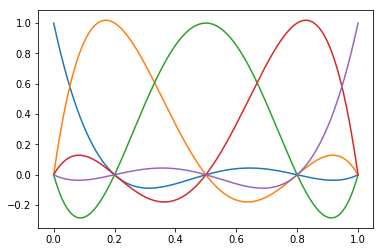

In [18]:
_ = plot(x, y.T)

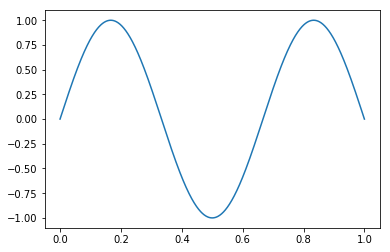

In [19]:
def myfun(x):
    return sin(3*pi*x)
    
plot(x, myfun(x))

In [20]:
# y contains each basis function evaluated at x
# q represent the support points for the Lagrange basis
p = y.T.dot(myfun(q))
f = myfun(x)

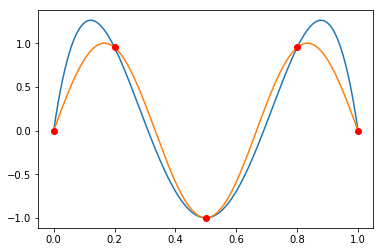

In [21]:
plot(x,p)
plot(x,f)
plot(q, myfun(q), 'or')

$$P(x_i) = (Lf)(x_i) = \Sigma_{\alpha=0}^{N_{q-1}}f(q_\alpha)l_\alpha(x_i) = Y^Tf(q) = \Sigma_{\alpha=0}^{N_{q-1}}(Y^T)_{i\alpha}f(q_\alpha)$$

In [23]:
# L infinity norm
linfty = max(abs(f-p))
linfty

0.45764326709559255

In [24]:
# See what happens to the error when we increase the number of points
N = range(3, 30)
ERROR = []
for n in N:
    q = linspace(0,1,n)
    y = array([lagrange(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    f = myfun(x)
    ERROR.append(max(abs(f-p)))

In [26]:
# ERROR will contain 27 objects, which are the error for the range
ERROR

[1.5924679270293969,
 0.9999999999999999,
 0.6363497751839438,
 0.42275016832268464,
 0.1301432415538613,
 0.08949523799199643,
 0.016245331775012417,
 0.011370529674977592,
 0.0013774323802967503,
 0.0009743119326660055,
 8.484908260603108e-05,
 6.044467609994664e-05,
 3.979445915319735e-06,
 2.8489453121616215e-06,
 1.4698762224041317e-07,
 1.0558914764757787e-07,
 4.390050017955005e-09,
 3.161232137172121e-09,
 1.0743882172814523e-10,
 8.267804496586706e-11,
 9.106437826034153e-12,
 1.3548412391983788e-11,
 2.7098032151506857e-11,
 4.7573139871914805e-11,
 1.2149437011998998e-10,
 1.7825517450997808e-10,
 2.874409182895832e-10]

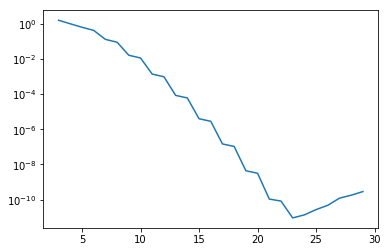

In [27]:
# Error decreases until a certain point, then raises again
semilogy(N, ERROR)

In [28]:
# This was for equidistant point
# Try now with the Chebyshev points, which are the one derived from the chebyshev-gauss quadrature
numpy.polynomial.chebyshev.chebgauss(3)

(array([ 8.66025404e-01,  6.12323400e-17, -8.66025404e-01]),
 array([1.04719755, 1.04719755, 1.04719755]))

In [29]:
# Since values are defined between -1 and 1 and we want only positive values
def cheb(n):
    return numpy.polynomial.chebyshev.chebgauss(n)[0]*.5+.5

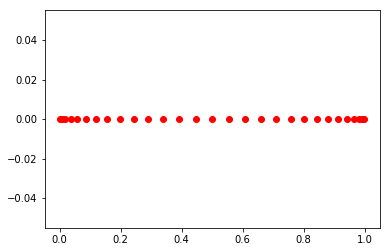

In [30]:
c = cheb(n)
plot(c, 0*c, 'or')

In [31]:
# See what happens to the error when we increase the number of points
N = range(3, 30)
ERROR2 = []
for n in N:
    q = cheb(n)
    y = array([lagrange(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    f = myfun(x)
    ERROR2.append(max(abs(f-p)))

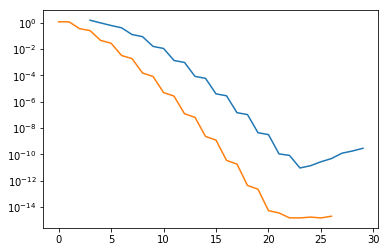

In [32]:
semilogy(N, ERROR, ERROR2)

In [33]:
# Chebyshev points go down until machine precision and then stop there
# We see they provide a much better approximation

In [39]:
# Define the error calculation in a single function
def error(q, myfun):
    y = array([lagrange(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    f = myfun(x)
    return max(abs(f-p))

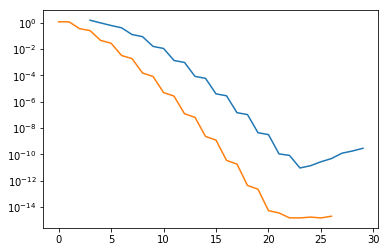

In [40]:
# Rewriting the previous steps with the function
N = range(3, 30)
error_equispaced = []
error_cheb = []
for n in N:
    error_cheb.append(error(cheb(n), myfun))
    error_equispaced.append(error(linspace(0,1,n), myfun))

semilogy(N, error_equispaced, error_cheb)

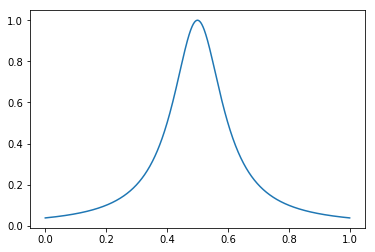

In [35]:
# Returns an object with two singularities in 0.5 and -0.5 in the complex plane
def myfun2(x):
    return 1/(1+100*(x-.5)**2)

plot(x, myfun2(x))

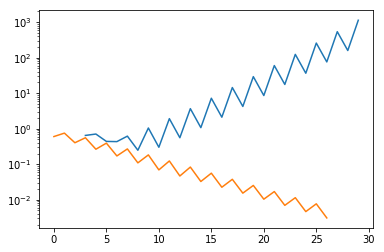

In [41]:
# Rewriting the previous steps with the function
N = range(3, 30)
error_equispaced = []
error_cheb = []
for n in N:
    error_cheb.append(error(cheb(n), myfun2))
    error_equispaced.append(error(linspace(0,1,n), myfun2))

semilogy(N, error_equispaced, error_cheb)

# Bernstein Polynomials Error

Basis function:

$$\Sigma_{i = 0}^n\binom{i}{n}(i-x)^ix^{n-i}$$

Bernstein approximation:

$$B_n^i = \binom{n}{i}(1-x)^{n-i}x^{i}$$

$$Bf = \Sigma_i B_i^n(x)f(\frac{i}{n})$$

In [42]:
from scipy.special import binom

In [58]:
# q is the equispace number of points
def bernstein(i, q, x):
    n = len(q) - 1
    return binom(n, i) * (1-x)**(n-i) * x**i

In [59]:
x2 = linspace(0,1,1025)
q2 = linspace(0,1,5)
y2 = array([bernstein(i2,q2, x2) for i2 in range(len(q2))])

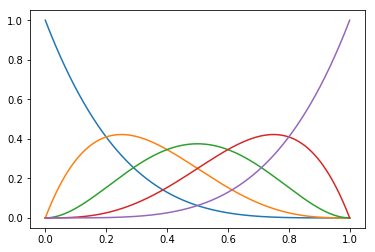

In [60]:
_ = plot(x2, y2.T)

In [61]:
# Generalize the error function
def error_g(q, myfun, interpolation=lagrange):
    y = array([interpolation(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    f = myfun(x)
    return max(abs(f-p))

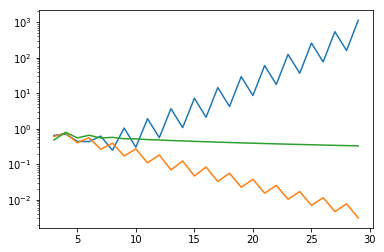

In [95]:
N = range(3, 30)
error_equispaced = []
error_cheb = []
error_bernstein = []
for n in N:
    error_cheb.append(error(cheb(n), myfun2))
    error_equispaced.append(error(linspace(0,1,n), myfun2))
    error_bernstein.append(error_g(linspace(0,1,n), myfun2, bernstein))
semilogy(N, error_equispaced)
semilogy(N, error_cheb)
semilogy(N, error_bernstein)

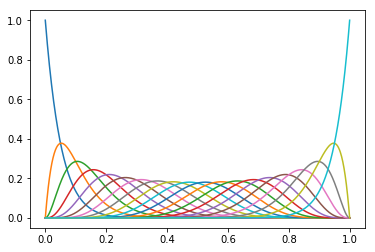

In [70]:
q = linspace(0, 1, 20)
y = array([bernstein(i,q,x) for i in range(len(q))])
_ = plot(x, y.T)

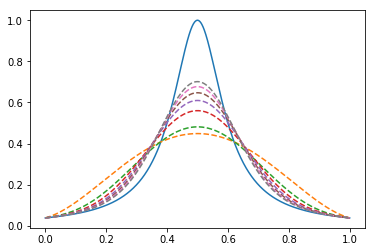

In [69]:
N = range(5, 40, 5)
plot(x, myfun2(x))
for n in N:
    q = linspace(0,1,n)
    y = array([bernstein(i, q, x) for i in range(len(q))])
    p = y.T.dot(myfun2(q))
    _ = plot(x, p, '--')

# Projection with L2 Norm

In [71]:
# I'm using fourth order polynomials
n = 5
# The L2 matrix
M = zeros((5,5))

for i in range(n):
    for j in range(n):
        M[i,j] = 1.0/(i+j+1)

In [72]:
M

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

$$M_{ij} = (x^j, x^i) = \int x^ix^j = \frac{1}{i+j+1}$$

$$F_i = \int fx^i$$

$$M_{ij}p^j = F_i \implies p^j = solve(M, F)$$

In [78]:
from scipy.integrate import quad

# We ignore the second dimension, which represents the error returned by the function quad
F = array([quad(lambda x: myfun2(x)*x**i, 0, 1)[0] for i in range(n)])

In [79]:
p_coeff= linalg.solve(M, F)

In [80]:
p_coeff.shape

(5,)

In [83]:
p = sum([x**i*p_coeff[i] for i in range(n)], axis=0)

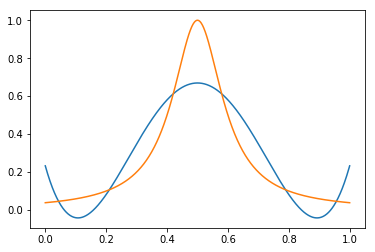

In [85]:
plot(x,p)
plot(x, myfun2(x))

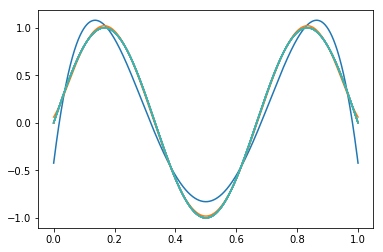

In [92]:
# Explicitly computing the matrix M.
# And then the L2 projection of matrix M, which is the best approximation with respect to the L2 norm.

N = range(5, 30, 3)

for n in N:
    M = zeros((n,n))

    for i in range(n):
        for j in range(n):
            M[i,j] = 1.0/(i+j+1)

    F = array([quad(lambda x: myfun(x)*x**i, 0, 1)[0] for i in range(n)])
    p_coeff= linalg.solve(M, F)
    p = sum([x**i*p_coeff[i] for i in range(n)], axis=0)

    plot(x,p)
plot(x, myfun(x))

#Those function are oscillating but they are getting closer and closer to the true value of the integral

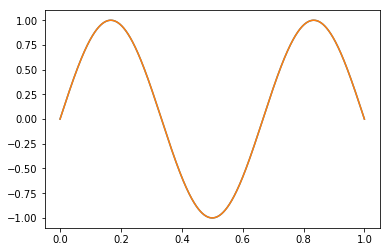

In [91]:
plot(x,p)
plot(x, myfun(x))

In [90]:
max(abs(p-myfun(x)))

9.16154197785346e-05